In [1]:
import numpy as np

In [3]:
data = np.loadtxt('ex2data2.txt', delimiter=',')
X = data[:,:2]
y = data[:,2:]

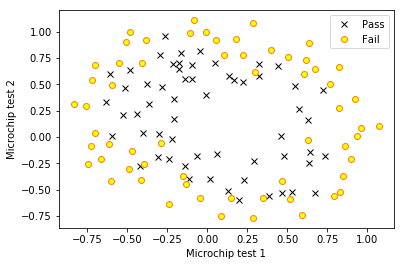

In [233]:
import ex2_reg_functions
import importlib
importlib.reload(ex2_reg_functions)
ex2_reg_functions.plotData(X, y)

In [250]:
X_whole = mapFeature(X[:,0],X[:,1])
lambda_reg = 1
initial_theta = np.zeros(X_whole.shape[1]).reshape(X_whole.shape[1])
cost = ex2_reg_functions.costFunctionReg(X_whole, y, initial_theta, lambda_reg)
grad = ex2_reg_functions.gradFunction(X_whole, y, initial_theta, lambda_reg)

In [251]:
print('Cost at initial theta (zeros): %.4f\n' %cost);
print('Expected cost (approx): 0.693\n');
print('Gradient at initial theta (zeros) - first five values only:\n');
print( grad[0:5]);
print('Expected gradients (approx) - first five values only:\n');
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n');

Cost at initial theta (zeros): 0.6931

Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:

[[  8.47457627e-03]
 [  1.87880932e-02]
 [  7.77711864e-05]
 [  5.03446395e-02]
 [  1.15013308e-02]]
Expected gradients (approx) - first five values only:

 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



In [252]:
test_theta = np.ones(X_whole.shape[1]).reshape(X_whole.shape[1])
test_lambda = 10
test_cost = ex2_reg_functions.costFunctionReg(X_whole, y, test_theta, test_lambda)
test_grad = ex2_reg_functions.gradFunction(X_whole, y, test_theta, test_lambda)

print('\nCost at test theta (with lambda = 10): %.3f\n' %test_cost);
print('Expected cost (approx): 3.16\n');
print('Gradient at test theta - first five values only:\n');
print(test_grad[0:5]);
print('Expected gradients (approx) - first five values only:\n');
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n');


Cost at test theta (with lambda = 10): 3.165

Expected cost (approx): 3.16

Gradient at test theta - first five values only:

[[ 0.34604507]
 [ 0.16135192]
 [ 0.19479576]
 [ 0.22686278]
 [ 0.09218568]]
Expected gradients (approx) - first five values only:

 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



In [169]:
from scipy import optimize

In [253]:
def redCostFunction(theta):
    return ex2_reg_functions.costFunctionReg(X_whole, y, theta, lambda_reg)
    #m = y.size
    #J = -(y*np.log(ex2_functions.sigmoidFunction(X, theta)) + (1-y)*np.log(1e-15+1-ex2_functions.sigmoidFunction(X, theta))).sum()/m
    #return J

def redGradFunction(theta):
    #m = y.size
    #grad = np.zeros(theta.size)
    #grad0 = (X[:,0].flatten()*(ex2_functions.sigmoidFunction(X, theta).flatten() - y.flatten())).sum()/m
    #grad1 = (X[:,1].flatten()*(ex2_functions.sigmoidFunction(X, theta).flatten() - y.flatten())).sum()/m
    #grad2 = (X[:,2].flatten()*(ex2_functions.sigmoidFunction(X, theta).flatten() - y.flatten())).sum()/m
    #return  np.asarray((grad0, grad1, grad2))
    return ex2_reg_functions.gradFunction(X_whole, y, theta, lambda_reg).flatten()

In [254]:
result = optimize.fmin_cg(redCostFunction, initial_theta, fprime=redGradFunction, maxiter=400, full_output=True, gtol=1e-15)

         Current function value: 0.529003
         Iterations: 34
         Function evaluations: 127
         Gradient evaluations: 115


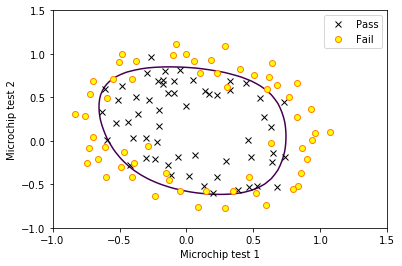

In [257]:
ex2_reg_functions.plotDecisionBoundary(X, y, result[0])

In [258]:
predict = ex2_reg_functions.predict(X_whole, result[0])
print('Train Accuracy: %.2f\n' %(np.mean(y[:,0] == predict[:,0])*100))
print('Expected Accuracy: 83.1%')

Train Accuracy: 83.05

Expected Accuracy: 83.1%
